In [1]:
import pandas as pd
from os.path import expanduser
import matplotlib.pyplot as plt


In [2]:
experiment_name = 'P3856'
run_name = 'P3856_YHE211_1_Slot1-1_1_5104'
precursor_definition_method = 'pasef'

In [3]:
MAXIMUM_Q_VALUE = 0.01

In [4]:
BASE_DIR = '{}/P3856-results-cs-false-fmdw-true-2021-04-28-22-33-56'.format(expanduser('~'))

FEATURES_DIR = '{}/features-{}'.format(BASE_DIR, precursor_definition_method)
FEATURES_NAME = '{}/exp-{}-run-{}-features-{}.pkl'.format(FEATURES_DIR, experiment_name, run_name, precursor_definition_method)
FEATURES_DEDUP_NAME = '{}/exp-{}-run-{}-features-{}-dedup.pkl'.format(FEATURES_DIR, experiment_name, run_name, precursor_definition_method)

IDENTS_DIR = '{}/identifications-{}'.format(BASE_DIR, precursor_definition_method)
IDENTS_NAME = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTS_DIR, experiment_name, precursor_definition_method)

In [5]:
features_before_dedup_df = pd.read_pickle(FEATURES_NAME)['features_df']

In [6]:
features_after_dedup_df = pd.read_pickle(FEATURES_DEDUP_NAME)['features_df']

In [7]:
identifications_before_unique_df = pd.read_pickle(IDENTS_NAME)['identifications_df']

In [8]:
unique_sequences_l = []
for group_name,group_df in identifications_before_unique_df.groupby(['sequence','charge'], as_index=False):
    min_q_value = group_df['percolator q-value'].min()
    min_mass_accuracy_ppm = group_df['mass_accuracy_ppm'].min()
    unique_sequences_l.append({'sequence_charge':group_name, 'min_mass_accuracy_ppm':min_mass_accuracy_ppm, 'min_q_value':min_q_value, 'feature_ids':group_df.feature_id.tolist(), 'q-values':group_df['percolator q-value'].tolist()})
unique_sequences_df = pd.DataFrame(unique_sequences_l)

In [9]:
unique_sequences_below_min_q_df = unique_sequences_df[(unique_sequences_df.min_q_value <= MAXIMUM_Q_VALUE)]

In [10]:
unique_sequences_below_min_ppm_df = unique_sequences_df[(abs(unique_sequences_df.min_mass_accuracy_ppm) <= 20)]

In [11]:
stats_d = {'features_before_dedup':len(features_before_dedup_df), 'features_after_dedup':len(features_after_dedup_df), 'recalibrated_idents_total':len(identifications_before_unique_df), 'recalibrated_idents_unique':len(unique_sequences_df), 'unique_idents_below_min_qvalue':len(unique_sequences_below_min_q_df), 'unique_sequences_below_min_ppm':len(unique_sequences_below_min_ppm_df)}
stats_d

{'features_before_dedup': 68098,
 'features_after_dedup': 46267,
 'recalibrated_idents_total': 26129,
 'recalibrated_idents_unique': 24820,
 'unique_idents_below_min_qvalue': 8004,
 'unique_sequences_below_min_ppm': 24820}

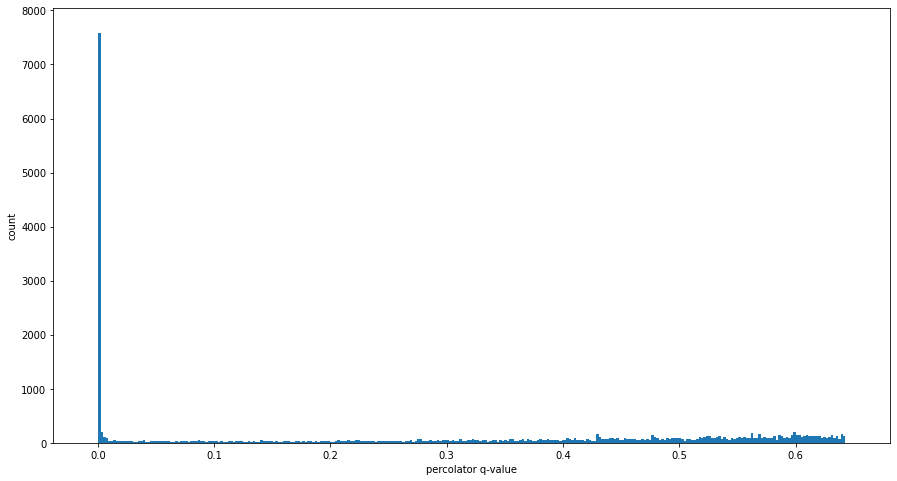

In [12]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
hist, bins, _ = plt.hist(unique_sequences_df.min_q_value, bins=bins)
plt.xlabel('percolator q-value')
plt.ylabel('count')

# plt.xlim((-20,20))
# plt.ylim((0,600))

plt.show()

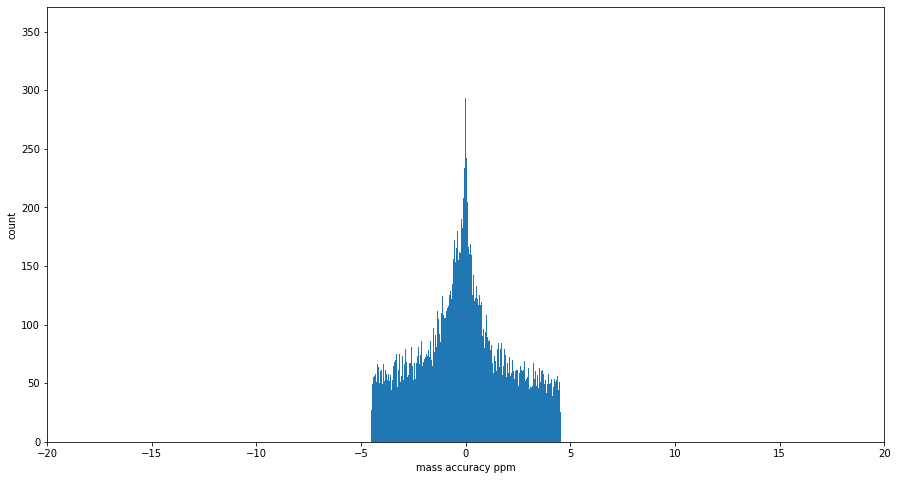

In [13]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
hist, bins, _ = plt.hist(unique_sequences_below_min_ppm_df.min_mass_accuracy_ppm, bins=bins)
plt.xlabel('mass accuracy ppm')
plt.ylabel('count')

plt.xlim((-20,20))
# plt.ylim((0,600))

plt.show()